In [41]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from mpl_toolkits.mplot3d import Axes3D #For 3d plotting.
import scipy.io #To load the files, loadmat
import copy
import time
import pdb

# kmeans - Sklearn

In [42]:
#Function to load matlab file.
def parse_file(name):
    data = scipy.io.loadmat(name) #Parse the matlab file into dictionary
    return data

In [43]:
#Plotting the data
def plot_data(X):
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(8)
    ax.scatter(X[:,0], X[:,1], s=5, marker = 'o')
    ax.grid()
    return(fig, ax)

In [44]:
#Plot data including colors
def plot_data_cluster(X, cluster_centers, labels):
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(8)
    ax.scatter(X[:,0], X[:,1], s=5, marker = 'o', c = labels)
    ax.scatter(cluster_centers[:,0], cluster_centers[:,1], s=200, marker = '*', c=np.arange(len(cluster_centers)))
    ax.grid()
    return(fig, ax)

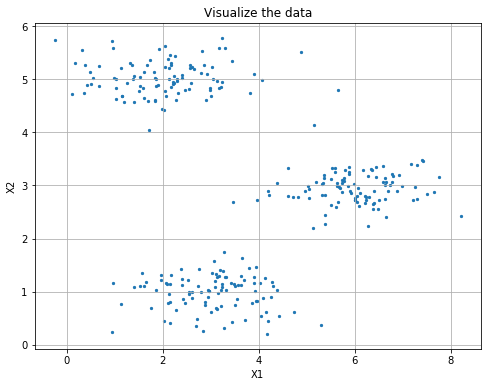

In [45]:
data = parse_file("ex7data2.mat")
fig, ax = plot_data(data['X'])
ax.set_title("Visualize the data")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
fig.show()

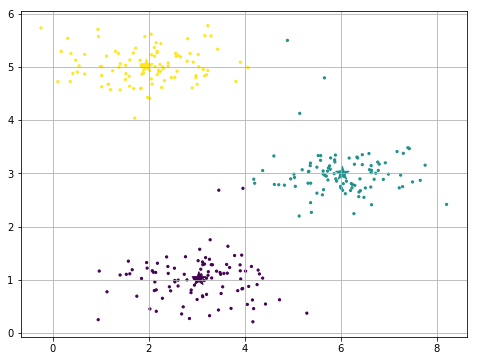

In [46]:
#Run preliminary analysis with Sklearn's module
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state = 0).fit(data['X'])
fig, ax = plot_data_cluster(data['X'], kmeans.cluster_centers_, kmeans.labels_)
fig.show()

# k-means - numpy implementation

In [47]:
#Implementation of kmeans with numpy
class Kmeans():
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        
    def fit(self, data):
        #pdb.set_trace()
        self.data = data
        self.num_points = data.shape[0]
        self.features = data.shape[1]
        
        #Initialize some random centers.
        #We want to start within the dataset to minimize travel
        #In this module, we simply select from the random distribution
        self.mean = np.mean(self.data, axis = 0)
        self.std = np.std(self.data, axis = 0)
        self.centroids = np.random.randn(self.n_clusters,self.features)*self.std + self.mean #Random distribution around std
        self.labels = self.__find_closest_centroid(self.data, self.centroids) #Get the labels of data with regard to our random centroid
        
        #Now, we keep updating the centroid based on mean
        #Each time, we find new points that are classified by this centroid.
        change = 1;
        while(change != 0):
            old_centroids = copy.deepcopy(self.centroids) #Keep the old centroids to track change in location.
            self.__update_centroids(self.data, self.centroids, self.labels) #Updated the centroids.
            change = np.linalg.norm(old_centroids-self.centroids) #Calculate change in centroids.
            self.labels = self.__find_closest_centroid(self.data, self.centroids) #Update the labels.
            #print("Change in centroids location: ", change) #Change in centroid location
        
    #Plot. 
    def plot(self):
        self.fig, self.ax = self.__plot_data_cluster(self.data, self.centroids, self.labels)
        self.fig.show()
        
    #Based on the data, and centroid location, find which centroid the data lies closest to.
    def __find_closest_centroid(self, data, centroids):
        distance = np.zeros((self.num_points,self.n_clusters))
        c = 0
        for centroid in centroids:
            distance[:,c] = np.linalg.norm(data-centroid, axis = 1)
            c += 1
        #Find which one has the minimum. 
        labels = np.argmin(distance, axis = 1) #Returns index of minimum value along axis.
        return(labels) #Returns the labels of which centroid to select.
    
    #Update centroid location based on mean of it's child datapoints.
    def __update_centroids(self, data, centroids, labels):
        #pdb.set_trace()
        #pdb.set_trace()
        for c in range(self.n_clusters):
            new = np.mean(data[labels == c], axis=0)
            if np.isnan(new).any(): #Check that centroid has points to calculate mean with
                pass #If it doesn't then we can leave it alone
            else:
                centroids[c] = new #Update centroid by taking mean.
    
    #Plot the data, including the clusters.
    def __plot_data_cluster(self, X, cluster_centers, labels):
        fig, ax = plt.subplots()
        fig.set_figheight(6)
        fig.set_figwidth(8)
        ax.scatter(X[:,0], X[:,1], s=5, marker = 'o', c = labels)
        ax.scatter(cluster_centers[:,0], cluster_centers[:,1], s=200, marker = '*', c=np.arange(len(cluster_centers)))
        ax.grid()
        return(fig, ax)

        

# Dataset 1

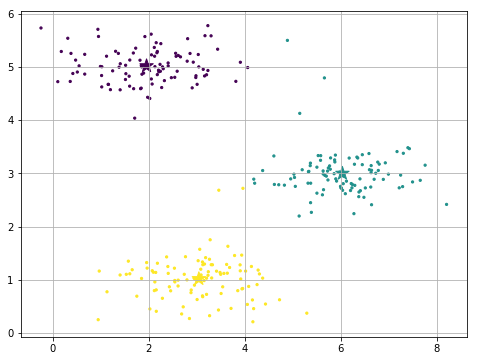

In [30]:
data = parse_file("ex7data2.mat")
kmeans = Kmeans(n_clusters = 3)
data = kmeans.fit(data['X'])
kmeans.plot()

# Dataset 2

In [77]:
#Load the dataset.
data = parse_file("ex6data3.mat")
print(data.keys())

dict_keys(['__version__', 'yval', 'y', 'X', '__globals__', '__header__', 'Xval'])


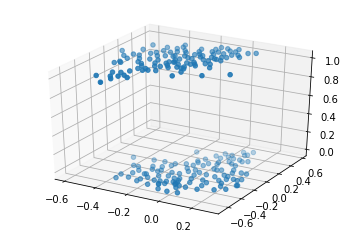

In [78]:
#Visualize the space, but in 3d since there are 3 features
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['X'][:,0],data['X'][:,1],data['y'])
plt.show()

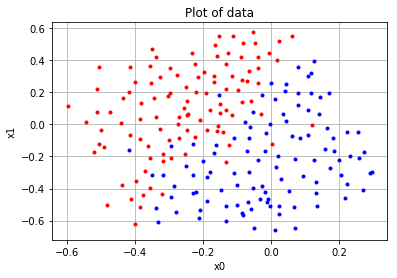

In [79]:
#Or in 2d.
#Visualize the data
for i in range(data['X'].shape[0]):
    if(data['y'][i] == 0):
        plt.plot(data['X'][i,0], data['X'][i,1], 'b.') #Blue
    elif(data['y'][i] == 1):
        plt.plot(data['X'][i,0], data['X'][i,1], 'r.') #Red
plt.title("Plot of data")
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid()
plt.show()

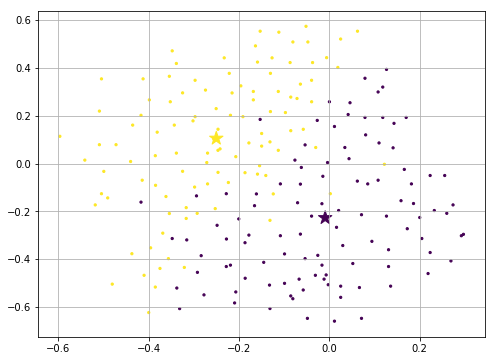

In [80]:
#Since y is also a feature, we will append it to X.
features = np.concatenate((data['X'], data['y']), axis=1)
kmeans = Kmeans(n_clusters = 2)
data = kmeans.fit(features)
kmeans.plot()

As we can see, the centroid locations were such that the optimal points were segmented into their respective groups.

# Kmeans image compression

In [146]:
#Load the image
def loadImage(name):
    image = plt.imread(name)
    return(image)

Reshaped to (16384, 3)


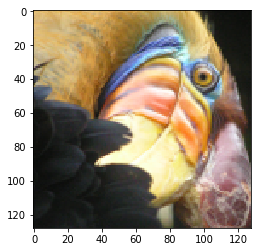

In [147]:
image = loadImage('bird_small.png')
plt.imshow(image)
old_shape = image.shape #We have loaded an array of 128x128 x3 colors.
#Each pixel has 3 features. We can reshape
image = image.reshape(-1,3)
print("Reshaped to", image.shape)

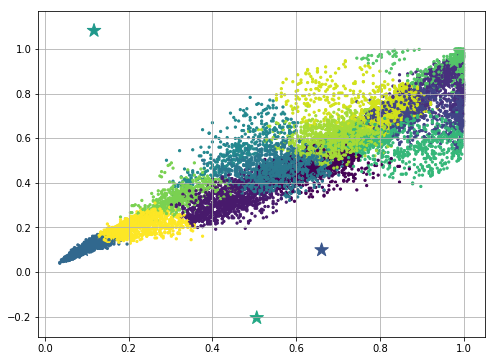

In [148]:
#We can use our k-means module to compress this image.
kmeans = Kmeans(n_clusters = 16)
kmeans.fit(image)
kmeans.plot() #See how the centroids are classifying the distribution of color.

In [149]:
#We now need to assi
#img128=colors.centroids[colors.labels]`
print(kmeans.centroids.shape)
print(kmeans.labels.shape)
#Convert the pixel labels back to centroid values.
converted_img = kmeans.centroids[kmeans.labels]
print(converted_img.shape)
#Reshape back to the original shape
converted_img = converted_img.reshape(old_shape)
print(converted_img.shape)

(16, 3)
(16384,)
(16384, 3)
(128, 128, 3)


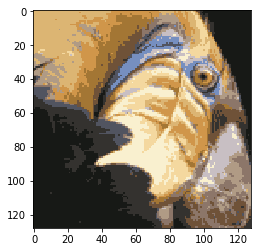

In [151]:
#Now we can save the image
plt.imshow(converted_img)
plt.imsave("./compressed_bird.png",  converted_img)